## Linear Algebra
1. __Scalar:__ A single number, denoted as _x_
2. __Vector:__ An array of scalars, denoted as ___x___
    - Vector has n scalars => x<sub>1</sub>, x<sub>2</sub>, ... , x<sub>n</sub>
    - Indexing begins with 1 (unlike Python where it begins with 0)
    
Python displays vector as a list (in one row), but it is actually a column vector (1 column, multiple rows)

In [1]:
import numpy as np

In [7]:
x1 = np.array([4, 5, 6])
print(x1)
print(x1.shape) # => (3,) => does not mean 3 rows no cols, it means its a VECTOR
print(x1[0])    # => Retrieves element directly

[4 5 6]
(3,)
4


In [9]:
x2 = np.array([[4],[5],[6]])
print(x2)
print(x2.shape) # => (3,1) => 3 rows, 1 col, ie, column vector
print(x2[0])    # => Retrieves 0th row which has one col with value = 4 => cant access 4 using this directly
print(x2[0][0]) # => Retrieves element directly

[[4]
 [5]
 [6]]
(3, 1)
[4]
4


In [10]:
x2 = x2.reshape(-1,)  # => any number of rows, no cols => so it becomes a vector
print(x2)
print(x2.shape)

[4 5 6]
(3,)


In [13]:
x3 = np.array([[4],[5],[6],[7]])
print(x3)
print(x3.shape)
print()

x3 = x3.reshape((-1, 2))
print(x3)
print(x3.shape)

[[4]
 [5]
 [6]
 [7]]
(4, 1)

[[4 5]
 [6 7]]
(2, 2)


### Matrices vs Tensors

#### Matrix:
1. 2D array of scalars, denoted as ___X___
2. mxn matrix has m rows and n columns
3. Each individual element X<sub>ij</sub> is a scalar
4. If m=n, it is a square matrix



#### Tensor:
1. Array with more than 2 axes, denoted as __X__
2. Multidimensional

In [22]:
# X is a Matrix

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(X.shape)
print(X)

print(X[1][1])

# Updating last two rows to have all elements as 0:
X[1: , :] = 0
print(X)

(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
5
[[1 2 3]
 [0 0 0]
 [0 0 0]]


In [23]:
# T is a Tensor

T = np.array([[[10, 20, 30],[40,50,60]], [[35,45,55],[65,75,85]]])
print(T.shape)
print(T)

# Front view is:
# 10 40
# 35 65

(2, 2, 3)
[[[10 20 30]
  [40 50 60]]

 [[35 45 55]
  [65 75 85]]]


#### Transpose
- (A<sup>T</sup>)<sub>i,j</sub> = A<sub>j,i</sub>
- Transpose of a column vector makes it into a row 
- Thus, column vector can be represented as: ___x___ = [x1, x2, x3]<sup>T</sup>

In [28]:
print(x3)
print()
x3T = x3.transpose()
print(x3T)

[[4 5]
 [6 7]]

[[4 6]
 [5 7]]


In [33]:
y = x3.reshape(([-1,1])) # => any number of rows, 1 column, ie, reshaping it to a column vector
print(y)
print(y.shape)
print()

yT = y.transpose()
print(yT)
print(yT.shape)

[[4]
 [5]
 [6]
 [7]]
(4, 1)

[[4 5 6 7]]
(1, 4)


### Broadcasting
- Adding a scalar number to a vector adds it to all values of the vector individually
- $x + a = x_i + a$
- We can also add a vector to a matrix


In [36]:
lst = [1, 2, 3, 4]
# lst + 1 Gives error, as we cant add scalar to a list

TypeError: can only concatenate list (not "int") to list

In [38]:
l = np.array(lst)
print(l)

l = l+1    # Does [1 2 3 4] + [1 1 1 1] = [2 3 4 5]
print(l)

l = l**2
print(l)

[1 2 3 4]
[2 3 4 5]
[ 4  9 16 25]


In [46]:
l2 = [[1,2,3,4],[5,6,7,8]]
print(l2)
print()

l2 = np.array(l2)
print(l2)
print()

l2 = l2**2
l2 = l2+1
print(l2)
print()

print(np.sqrt(l2))

[[1, 2, 3, 4], [5, 6, 7, 8]]

[[1 2 3 4]
 [5 6 7 8]]

[[ 2  5 10 17]
 [26 37 50 65]]

[[1.41421356 2.23606798 3.16227766 4.12310563]
 [5.09901951 6.08276253 7.07106781 8.06225775]]


## Matrix Multiplication (Dot Product)
- For A of shape mxk and B of shape kxn, we get C of shape mxn 
- 2nd dimension of 1st matrix and 1st dimension of 2nd matrix should match
- Can be thought of as linear combination of columns of <b>A</b> weighted by column entries of __B__

In [48]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])
Y = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

print(X.shape)
print(Y.shape)

(3, 3)
(3, 4)


In [50]:
print(X)
print()
print(Y)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [53]:
print(np.dot(X, Y)) 
print(np.dot(X, Y).shape) 

[[ 38  44  50  56]
 [ 83  98 113 128]
 [128 152 176 200]]
(3, 4)


## Element-wise Multiplication (Hadamard Product)
- 1st matrix and 2nd matrix should have exactly same shape
- Same position elements multiplied
- Uses * instead of np.dot()

In [59]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])
Y = np.eye(3)
Y2 = Y*2 + 1

print(X)
print()
print(Y)
print()
print(Y2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[3. 1. 1.]
 [1. 3. 1.]
 [1. 1. 3.]]


In [58]:
print(X*Y)
print()
print(np.dot(X,Y))

[[1. 0. 0.]
 [0. 5. 0.]
 [0. 0. 9.]]

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [60]:
print(X*Y2)

[[ 3.  2.  3.]
 [ 4. 15.  6.]
 [ 7.  8. 27.]]


## Norms
- Sort of like a proxy for the size of a vector
- $L^p$ norm is defined as: $||x||_p$ = $(\sum|x_i|^p)^\frac{1}{p}$, $p \geq 1$
- $L^2$ norm is called Euclidean norm, denoted as $||x||$

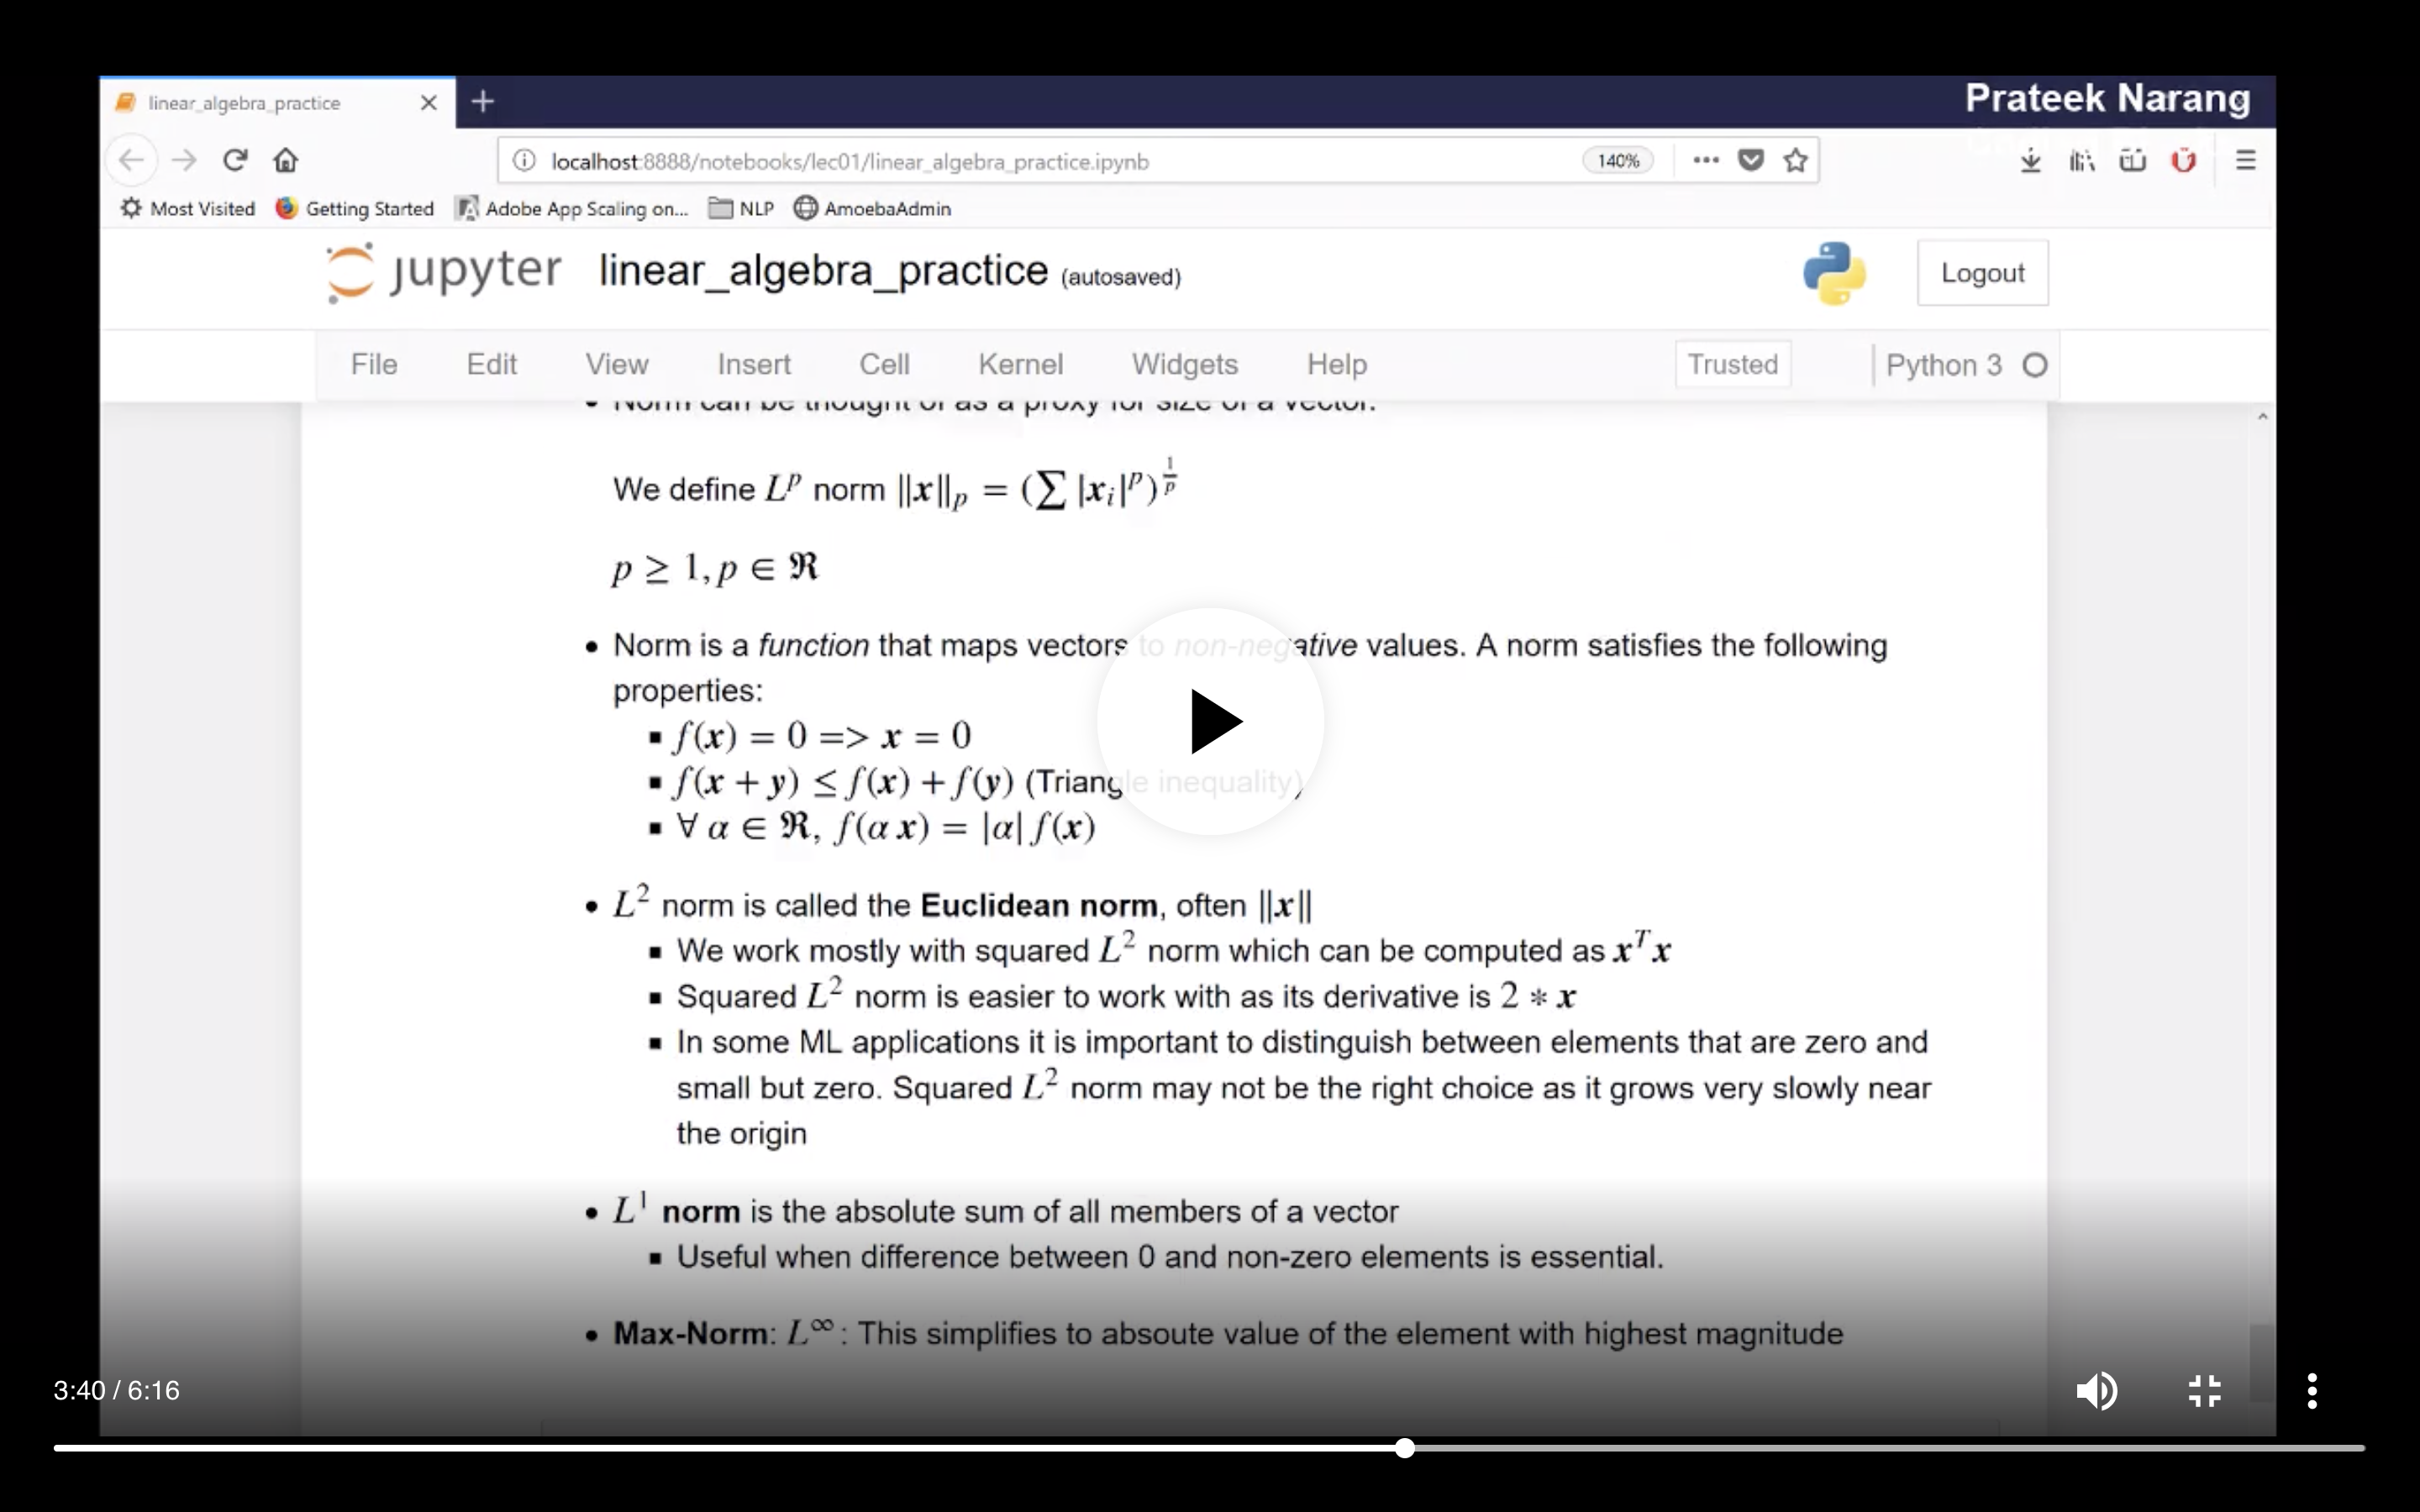

In [61]:
x = np.array([-3, -15, 10, 6])

In [65]:
l2 = np.linalg.norm(x)            # Default is Euclidean norm => ie L2
print("Using norm function:", l2)
print("Calculating ourself:", np.sqrt(np.sum(x**2)))

Using norm function: 19.235384061671343
Calculating ourself: 19.235384061671343


In [66]:
l1 = np.linalg.norm(x, ord=1)
print(l1)
# Equal to 3+15+10+6 (sum of absolute values)

34.0


In [68]:
linf = np.linalg.norm(x, ord=np.inf)
print(linf)
# Equal to value with highest absolute magnitude

15.0
